In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel("Data_Cortex_Nuclear.xls",index_col = "MouseID")
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
df.shape

(1080, 81)

In [4]:
df.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [5]:
df["class"].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [6]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [7]:
#define numerical & categorical columns
numeric_features = [col for col in df.columns if df[col].dtype != 'O']
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

#print columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features : {categorical_features}')

We have 77 numerical features : ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']

We have 4 categorical features : ['Genotype', 'Treatment', 'Behavior', 'class']


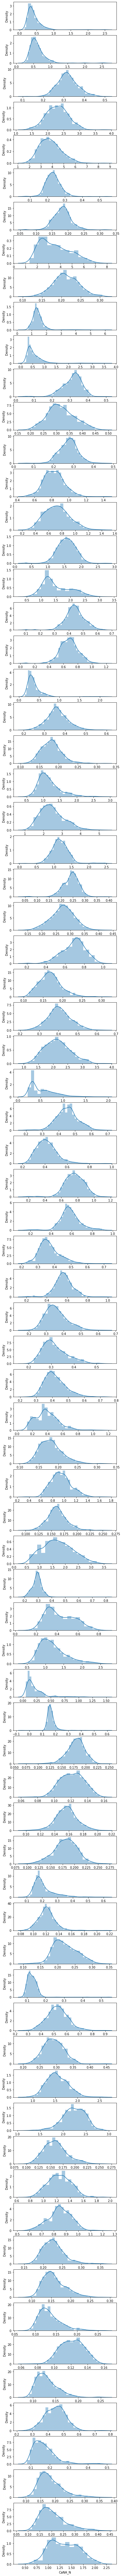

In [52]:
#visualizing the distribution of each independent column

fig, axs = plt.subplots(len(df.columns[:-4]), 1, figsize=(6, len(df.columns[:-4])*2))
for i, col in enumerate(df.columns[:-4]):
    sns.distplot(df[col], ax=axs[i])

#### Report:

1. Most of the columns are normally distributed.
2. Transformation of data is not of prime importance as it is a classification problem.
3. Interpreting each and every column is not necessary as these are protein expression levels.

## Checking Missing Values

In [9]:
df.isnull().sum().sum()

1396

In [10]:
null_columns = df.columns[df.isnull().sum() > 0]
null_columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N',
       'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'],
      dtype='object')

In [11]:
df[null_columns].isnull().sum().sort_values(ascending=False)

BCL2_N        285
H3MeK4_N      270
BAD_N         213
EGR1_N        210
H3AcK18_N     180
pCFOS_N        75
ELK_N          18
Bcatenin_N     18
MEK_N           7
P38_N           3
TRKA_N          3
RSK_N           3
APP_N           3
SOD1_N          3
MTOR_N          3
AMPKA_N         3
pMTOR_N         3
DSCR1_N         3
GSK3B_N         3
NR2B_N          3
pNUMB_N         3
RAPTOR_N        3
TIAM1_N         3
pP70S6_N        3
JNK_N           3
DYRK1A_N        3
ITSN1_N         3
pJNK_N          3
BDNF_N          3
NR1_N           3
NR2A_N          3
pAKT_N          3
pBRAF_N         3
pCAMKII_N       3
pCREB_N         3
pELK_N          3
pERK_N          3
PKCA_N          3
CREB_N          3
pMEK_N          3
pNR1_N          3
pNR2A_N         3
pNR2B_N         3
pPKCAB_N        3
pRSK_N          3
AKT_N           3
BRAF_N          3
CAMKII_N        3
ERK_N           3
dtype: int64

#### Report:

None of our columns have more than 30% missing data. So, no need to drop any columns.

## Handling Missing Values

In [12]:
"""#filling the null values with the mean of the respective column

for col in null_columns:
    mean=df[col].mean()
    df[col].fillna(value=mean, inplace=True)"""

'#filling the null values with the mean of the respective column\n\nfor col in null_columns:\n    mean=df[col].mean()\n    df[col].fillna(value=mean, inplace=True)'

In [13]:
"""df.isnull().sum().sum()"""

'df.isnull().sum().sum()'

## Checking if the output feature is balanced

<AxesSubplot:>

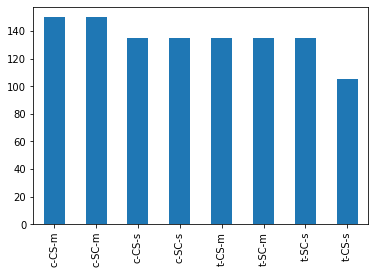

In [12]:
df["class"].value_counts().plot(kind = 'bar')

#### Report:

Number of records for each class is evenly spread. No issues of imbalanced data.

## Encoding output feature

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [14]:
df.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [15]:
# Splitting X and y for all Experiments
X= df.drop(['Genotype', 'Treatment', 'Behavior', 'class'], axis=1)
y = df['class']

In [16]:
X.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [17]:
y.head()

MouseID
309_1    0
309_2    0
309_3    0
309_4    0
309_5    0
Name: class, dtype: int32

## Creating Functions for model training and evaluation

In [18]:
def evaluate_clf(true, predicted, predicted_proba):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted, average='macro') # Calculate F1-score
    precision = precision_score(true, predicted, average='macro') # Calculate Precision
    recall = recall_score(true, predicted, average='macro')  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted_proba, average='macro', multi_class='ovr') #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [19]:
# Create a function which can evaluate models and return a report 

def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    
    #Initializing lists for report creation
    models_list = []
    cross_validation_score = []
    cross_validation_std = []
    
    #Initializing cross validation
    kfold_validation = KFold(10)
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_train_pred_proba = model.predict_proba(X_train)
        y_test_pred_proba = model.predict_proba(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred, y_train_pred_proba)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred, y_test_pred_proba)
        
        # Calculating cross validation score with 10 fold validation
        val_score = cross_val_score(model,X_test,y_test,cv=kfold_validation)
        val_score_mean = np.mean(val_score)
        val_score_std = np.std(val_score)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        cross_validation_score.append(val_score_mean)
        cross_validation_std.append(val_score_std)
        print('='*35)
        print('\n')
        
        report=pd.DataFrame(list(zip(models_list, cross_validation_score, cross_validation_std)),\
                            columns=['Model Name', 'Corss Validation Score', \
                                     "CV Standard Deviation"]).sort_values(by=["Corss Validation Score",\
                                                                               "CV Standard Deviation"], ascending = False)
        
    return report

## Experimenting with different transformation techniques to find the best

### Experiment: 1 = KNN Imputer for Null values

In [22]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [23]:
# Finding the optimal n_neighbour value for KNN imputer

results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.4907)
n_neighbors= 3 || accuracy (0.4926)
n_neighbors= 5 || accuracy (0.4917)
n_neighbors= 7 || accuracy (0.4898)
n_neighbors= 9 || accuracy (0.4898)


Looks like n_neighbors = 3 is able to give us the highest accuracy

In [24]:
# Pipeline for KNN imputer

num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [25]:
X_knn =knn_pipeline.fit_transform(X)

In [26]:
# Dictionary which contains models for experiment
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Naive-Bayes Classifier": GaussianNB()
}

In [27]:
# Training all models
report_knn = evaluate_models(X_knn, y, models)

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9934
- F1 score: 0.9935
- Precision: 0.9938
- Recall: 0.9933
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9475
- F1 score: 0.9459
- Precision: 0.9526
- Recall: 0.9451
- Roc Auc Score: 0.9974


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9722
- F1 score: 0.9665
- Precision: 0.9719
- Recall: 0.9667
- Roc Auc Score: 0.9994


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8549
- F1 score: 0.8541
- Precision: 0.8552
- Recall: 0.8547
- Roc Auc Score: 0.9170


Gradient Boosting
Model performance for Traini

In [28]:
report_knn

,Model Name,Corss Validation Score,CV Standard Deviation
4,Logistic Regression,0.962689,0.033695
6,CatBoosting Classifier,0.932197,0.035486
1,Random Forest,0.901231,0.038805
5,XGBClassifier,0.870644,0.040222
3,Gradient Boosting,0.864015,0.058015
0,K-Neighbors Classifier,0.811553,0.081623
7,Naive-Bayes Classifier,0.706439,0.071957
2,Decision Tree,0.700568,0.075857


### Experiment: 2 = Simple Imputer with Strategy Median for Null values

In [29]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [30]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [31]:
# Training all models
report_median = evaluate_models(X_median, y, models)

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9947
- F1 score: 0.9948
- Precision: 0.9950
- Recall: 0.9946
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9599
- F1 score: 0.9583
- Precision: 0.9628
- Recall: 0.9573
- Roc Auc Score: 0.9994


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9815
- F1 score: 0.9769
- Precision: 0.9801
- Recall: 0.9773
- Roc Auc Score: 0.9996


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8488
- F1 score: 0.8464
- Precision: 0.8457
- Recall: 0.8488
- Roc Auc Score: 0.9136


Gradient Boosting
Model performance for Traini

In [32]:
report_median

,Model Name,Corss Validation Score,CV Standard Deviation
4,Logistic Regression,0.962689,0.033695
6,CatBoosting Classifier,0.932197,0.040619
1,Random Forest,0.910417,0.048789
3,Gradient Boosting,0.876420,0.060609
5,XGBClassifier,0.870644,0.039931
0,K-Neighbors Classifier,0.802273,0.075715
2,Decision Tree,0.725284,0.061485
7,Naive-Bayes Classifier,0.721780,0.071866


### Experiment: 3 = Simple Imputer with Strategy Constant for Null values

In [20]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [21]:
X_const =constant_pipeline.fit_transform(X)

In [35]:
# Training all models
report_const = evaluate_models(X_const, y, models)

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9947
- F1 score: 0.9947
- Precision: 0.9953
- Recall: 0.9942
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9722
- F1 score: 0.9693
- Precision: 0.9734
- Recall: 0.9685
- Roc Auc Score: 0.9998


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9877
- F1 score: 0.9844
- Precision: 0.9857
- Recall: 0.9848
- Roc Auc Score: 0.9996


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8333
- F1 score: 0.8269
- Precision: 0.8282
- Recall: 0.8277
- Roc Auc Score: 0.9020


Gradient Boosting
Model performance for Traini

In [36]:
report_const

,Model Name,Corss Validation Score,CV Standard Deviation
4,Logistic Regression,0.981439,0.020618
6,CatBoosting Classifier,0.932292,0.059792
1,Random Forest,0.901231,0.060354
5,XGBClassifier,0.876799,0.047045
3,Gradient Boosting,0.863826,0.062823
0,K-Neighbors Classifier,0.812121,0.085280
7,Naive-Bayes Classifier,0.743939,0.055864
2,Decision Tree,0.713068,0.063775


### Experiment: 4 = Simple Imputer with Strategy Mean for Null values

In [37]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [38]:
X_mean = mean_pipeline.fit_transform(X)

In [39]:
# Training all models
report_mean = evaluate_models(X_mean, y, models)

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9934
- F1 score: 0.9934
- Precision: 0.9936
- Recall: 0.9934
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9537
- F1 score: 0.9521
- Precision: 0.9568
- Recall: 0.9512
- Roc Auc Score: 0.9994


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9784
- F1 score: 0.9743
- Precision: 0.9775
- Recall: 0.9747
- Roc Auc Score: 0.9997


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8488
- F1 score: 0.8413
- Precision: 0.8436
- Recall: 0.8407
- Roc Auc Score: 0.9095


Gradient Boosting
Model performance for Traini

In [40]:
report_mean

,Model Name,Corss Validation Score,CV Standard Deviation
4,Logistic Regression,0.959564,0.039698
6,CatBoosting Classifier,0.935322,0.039694
1,Random Forest,0.910606,0.031996
3,Gradient Boosting,0.885417,0.054546
5,XGBClassifier,0.870455,0.042552
0,K-Neighbors Classifier,0.799053,0.070804
7,Naive-Bayes Classifier,0.709564,0.077807
2,Decision Tree,0.706534,0.065357


### Experiment: 5 = Principle component analysis with imputing median

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [43]:
X_pca = pca_pipeline.fit_transform(X)

In [44]:
# Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,77):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<AxesSubplot:>

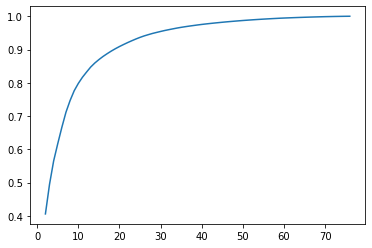

In [45]:
# Plotting variance ratio
pd.Series(var_ratio).plot()

<Figure size 360x360 with 0 Axes>

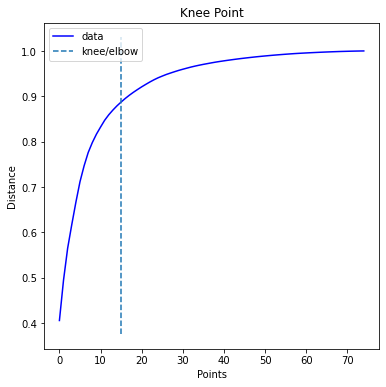

Knee Locator k = 17


In [46]:
# Kneed algorithm to find elbow point

from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [47]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=17,random_state=42)

reduced=pca_final.fit_transform(X_pca)

In [48]:
report_pca = evaluate_models(reduced,y, models)

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9868
- F1 score: 0.9850
- Precision: 0.9852
- Recall: 0.9849
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9506
- F1 score: 0.9468
- Precision: 0.9533
- Recall: 0.9461
- Roc Auc Score: 0.9949


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9660
- F1 score: 0.9634
- Precision: 0.9684
- Recall: 0.9613
- Roc Auc Score: 0.9987


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7870
- F1 score: 0.7844
- Precision: 0.7852
- Recall: 0.7860
- Roc Auc Score: 0.8777


Gradient Boosting
Model performance for Traini

In [49]:
report_pca

,Model Name,Corss Validation Score,CV Standard Deviation
6,CatBoosting Classifier,0.932008,0.039014
1,Random Forest,0.888826,0.053996
3,Gradient Boosting,0.864394,0.041468
4,Logistic Regression,0.860890,0.067331
5,XGBClassifier,0.811932,0.069046
0,K-Neighbors Classifier,0.778125,0.087772
7,Naive-Bayes Classifier,0.718939,0.070937
2,Decision Tree,0.669318,0.109086


#### Report

Seems like the Simple Imputer with Strategy Constant along with Logistic Regression is giving us the best results. So, we will proceed with Logistic Regression model.

### Hyperparameter Tuning for Final model

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [28]:
final_model = LogisticRegression()

In [29]:
kfold_validation = KFold(10)

In [32]:
X_train_const, X_test_const, y_train, y_test = train_test_split(X_const,y,test_size=0.3,random_state=42)

In [33]:
grid_search = GridSearchCV(estimator=final_model, param_grid=param_grid, n_jobs=-1, cv=kfold_validation)

In [34]:
grid_result = grid_search.fit(X_train_const, y_train)

In [35]:
grid_result.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [36]:
grid_result.best_score_

0.9947368421052631

### Fitting the Final model and get reports

In [39]:
final_model_with_best_params = LogisticRegression(C= 10, max_iter= 100, penalty= 'l2', solver= 'lbfgs')

In [40]:
final_model_with_best_params = final_model_with_best_params.fit(X_train_const, y_train)

In [42]:
y_pred = final_model_with_best_params.predict(X_test_const)

In [43]:
print("Final LogisticRegression model Accuracy Score (Train) :", final_model_with_best_params.score(X_train_const, y_train))
print("Final LogisticRegression model Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final LogisticRegression model Accuracy Score (Train) : 1.0
Final LogisticRegression model Accuracy Score (Test) : 0.9969135802469136


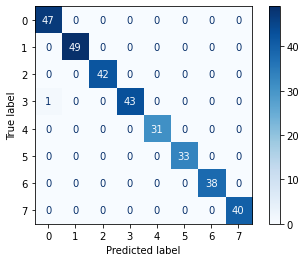

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

#plots Confusion matrix
ConfusionMatrixDisplay.from_estimator(final_model_with_best_params, X_test_const, y_test, cmap = 'Blues', values_format = 'd')

# The best model is Logistic Regression with an accuracy of about 99.6%